___
## 1.1 Estimación del Centro de Masa de una Lámina Bidimensional.
> Debe describir el trabajo.

## 1.2 Introducción
> Debe contextualizar y describir el problema que se va a trabajar.


## 1.3 Objetivos del la estimación.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


### 1.4 Modelo que representa el problema 1.
> - Se debe incluir las ecuaciones que rigen el sistema que se está estudiando.
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

#### Modelado
El problema que estamos abordando consiste en calcular el centro de masa de un sólido de revolución generado por la función $(f(x) = x^2)$ en el intervalo $([0, 1])$ al ser rotada alrededor del eje x.

#### Ecuaciones que rigen al sistema
1. **Función de la Curva Generadora**:

   La función que describe la curva generadora es $(f(x) = x^2)$, que representa la relación entre la coordenada y $(y)$ y la coordenada x $(x)$ del sólido de revolución.

2. **Región de Integración**:

   La región de integración está definida por $(R = \left[0, 1\right] \times \left[-1, 1\right] \times \left[-1, 1\right])$, donde $(x)$ varía en el intervalo $([0, 1])$, y $(y)$ y $(z)$ en $([-1, 1])$.

3. **Función de Aceptación (Region)**:

   La función de aceptación determina si un punto ($(x, y, z)$) está dentro del sólido de revolución. En este caso, la función de aceptación es $(y^2 + z^2 \leq x^4)$.

#### Deducción del modelo

El sólido de revolución se genera al rotar la función $(f(x) = x^2)$ alrededor del eje x. Esto resulta en un sólido tridimensional con simetría respecto al eje x, y la forma del sólido depende de cómo se distribuye la función $(f(x))$ alrededor del eje de rotación.


#### Situación representada y limitaciones

El modelo representa un problema de cálculo del centro de masa de un sólido de revolución, donde la densidad del sólido puede suponerse uniforme. Las limitaciones fundamentales incluyen:

- El modelo asume una distribución uniforme de densidad dentro del sólido.
- Se limita a sólidos de revolución generados por funciones de una variable.

#### Significado y valor de los parámetros

- $(x)$ es el parámetro de la función \(f(x) = x^2\) que determina la forma de la generatriz.
- $(y)$ y $(z)$ son las coordenadas en el espacio tridimensional.
- $(y^2 + z^2 \leq x^4)$ define la región dentro del sólido de revolución. Las variables $(x)$, $(y)$ y $(z)$ están sujetas a esta condición para ser consideradas dentro del sólido.

In [36]:
# Escribir la función acá
def montecarlo3(region, a1, b1, a2, b2, a3, b3, N):
    AR = (b1-a1)*(b2-a2)*(b3-a3)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    z = np.random.uniform(a3, b3, N)
    bi = region(x, y, z)
    VD_approx = AR*np.mean(bi)
    return VD_approx

### 1.5 Solución del problema 1.

In [55]:
import numpy as np

def f(x):
    return x**2

def region(x, y, z):
    return (y**2 + z**2 <= f(x))

a1 = 0
b1 = 1
a2 = -1
b2 = 1
a3 = -1
b3 = 1
N = 100000

VD_approx = montecarlo3(region, a1, b1, a2, b2, a3, b3, N)
print("Aproximación del volumen:", VD_approx)


Aproximación del volumen: 1.0408


In [56]:
x_center_of_mass = np.mean(np.random.uniform(a1, b1, N)**3) * np.pi * VD_approx
x_center_of_mass /= np.mean(np.pi * (np.random.uniform(a1, b1, N)**2))

print("Aproximación del centro de masa en x:", x_center_of_mass)


Aproximación del centro de masa en x: 0.7755060237675981


### 1.6 Visualización de la solución del problema 1.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

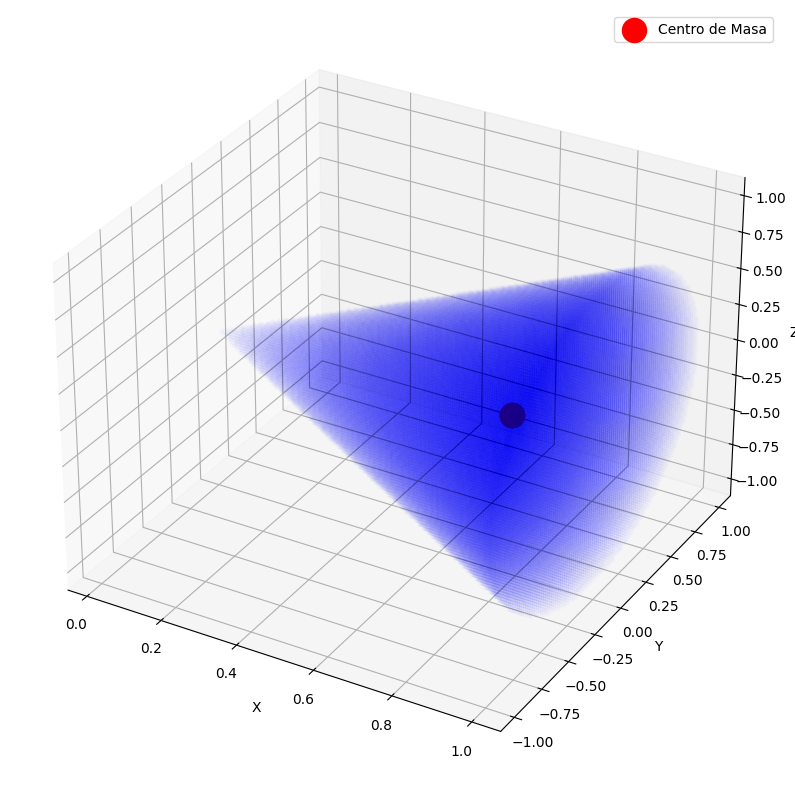

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def region(x, y, z):
    return (y**2 + z**2 <= f(x))

# Generar puntos para graficar
x = np.linspace(0, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
X, Y, Z = np.meshgrid(x, y, z)
region_points = region(X, Y, Z)

# Graficar la región
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[region_points], Y[region_points], Z[region_points], c='blue', marker='.', alpha=.01) # Ajuste de transparencia
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Calcular el centro de masa
x_center_of_mass = np.mean(np.random.uniform(a1, b1, N)**3) * np.pi * VD_approx
x_center_of_mass /= np.mean(np.pi * (np.random.uniform(a1, b1, N)**2))

# Mostrar el centro de masa en la gráfica
ax.scatter(x_center_of_mass, 0, 0, c='red', marker='o', s=300, alpha=1, label='Centro de Masa') # Ajuste de tamaño y color
ax.legend()

plt.show()


___
## 2.1 Problema de Monty Hall (2).

## 2.2 Introducción
> El problema de Monty Hall es un problema de probabilidad basado en un concurso de televisión. En este concurso, el participante tiene la oportunidad de elegir entre tres puertas, detrás de una de las cuales se encuentra un premio, mientras que las otras dos contienen cabras.


## 2.3 Objetivos del problema de Monty Hall (2).
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.


### 2.4 Modelo que representa el problema de Monty Hall (2).

#### Modelado
> - Elección Inicial: El participante realiza una elección inicial entre l]as tres puertas.
> - 
Acción del Presentador: Una vez hecha la elección del participante, el presentador, quien conoce el contenido detrás de cada puerta, abre una de las dos puertas restantes que no ha sido elegida por el participante. Esta puerta revelada siempre contiene una cabr.> - 

Elección Final: El participante tiene la opción de mantener su elección original o cambiar a la otra puerta que no ha sido abierta ni elegida inicialme

#### Ecuaciones que rigen al sistema
> - El problema de Monty Hall no se rige por ecuaciones matemáticas en el sentido tradicional. En su lugar, se basa en conceptos de probabilidad y toma de decisiones. Si el participante elige al azar, la probabilidad de elegir la puerta con el premio al principio es de 1/3.

#### Deducción del modelo
> - No incluye ecuaciones matemáticas en el sentido tradicional, ya que se basa en conceptos de probabilidad y toma decisiones discretas.

#### Situación representada y limitaciones
> - Representa una situación de decisión bajo incertidumbre, donde el participante debe elegir entre diferentes opciones con información parcial. La principal limitación es que se basa en un juego simplificado y no tiene en cuenta factores externos o complejidades adicionales.

#### Significado y valor de los parámetros
> - El modelo no tiene parámetros o constantes específicas. Sin embargo, se asume que todas las puertas y elecciones son igualmente probables y que el presentador siempre revela una puerta con una cabra.nte.

In [2]:
# Método de Montecarlo
def montecarlo1(f, a, b, N):
    # Generar N puntos uniformemente distribudos en el intervalo [a,b)
    ui = np.random.uniform(a, b, N)
    # Evaluar la función en los N puntos aleatorios, obtener el promedio y multiplicarlo por el intervalo
    integral = ((b-a)/N)*np.sum(f(ui))
    # integral = (b-a)*np.mean(f(ui))   Esta línea es equivalente a la anterior
    return integral

### 2.5 Solución del problema de Monty Hall (2).

In [20]:
import numpy as np

def montecarlo1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

def montecarlo_monty_hall_individual(N):  # Agregamos N como argumento
    num_ganadas = 0

    for _ in range(N):
        # Simulación de un juego de Monty Hall
        puerta_con_premio = np.random.randint(1, 4)
        eleccion_concursante = np.random.randint(1, 4)

        puertas_posibles = [1, 2, 3]
        puertas_posibles.remove(eleccion_concursante)
        if eleccion_concursante != puerta_con_premio:
            puertas_posibles.remove(puerta_con_premio)
        puerta_revelada = np.random.choice(puertas_posibles)

        puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
        eleccion_final = np.random.choice(puertas_restantes)

        if eleccion_final == puerta_con_premio:
            num_ganadas += 1

    probabilidad_de_ganar = num_ganadas / N
    return probabilidad_de_ganar

def montecarlo_monty_hall(N):
    a = 0
    b = N
    return montecarlo1(lambda x: montecarlo_monty_hall_individual(N), a, b, N)  # Usamos una función lambda para pasar N

# Ejemplo de uso
N = 100000
resultado = montecarlo_monty_hall(N)
print(f"Después de {N} simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente {resultado:.4f}")


Después de 100000 simulaciones, la probabilidad de ganar cambiando de puerta es aproximadamente 0.6653


### 2.6 Visualización de la solución del problema 2.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

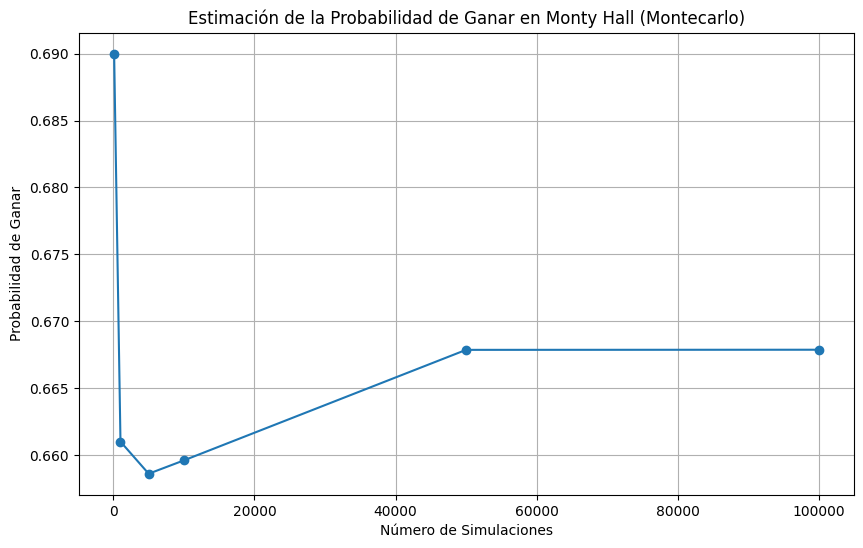

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def montecarlo1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

def montecarlo_monty_hall(N):
    def f(x):
        return montecarlo_monty_hall_individual()

    def montecarlo_monty_hall_individual():
        num_ganadas = 0

        for _ in range(N):
            # Simulación de un juego de Monty Hall
            puerta_con_premio = np.random.randint(1, 4)
            eleccion_concursante = np.random.randint(1, 4)

            puertas_posibles = [1, 2, 3]
            puertas_posibles.remove(eleccion_concursante)
            if eleccion_concursante != puerta_con_premio:
                puertas_posibles.remove(puerta_con_premio)
            puerta_revelada = np.random.choice(puertas_posibles)

            puertas_restantes = [puerta for puerta in [1, 2, 3] if puerta != eleccion_concursante and puerta != puerta_revelada]
            eleccion_final = np.random.choice(puertas_restantes)

            if eleccion_final == puerta_con_premio:
                num_ganadas += 1

        probabilidad_de_ganar = num_ganadas / N
        return probabilidad_de_ganar

    a = 0
    b = N
    return montecarlo1(f, a, b, N)

# Lista para almacenar las probabilidades estimadas
N_values = [100, 1000, 5000, 10000, 50000, 100000]
probabilidades = []

# Realizar simulaciones y guardar las probabilidades
for N in N_values:
    resultado = montecarlo_monty_hall(N)
    probabilidades.append(resultado)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N_values, probabilidades, marker='o')
plt.title('Estimación de la Probabilidad de Ganar en Monty Hall (Montecarlo)')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Probabilidad de Ganar')
plt.grid(True)
plt.show()


### 3 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 4 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>